In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# creating the data with linspaces

X = np.linspace(0,50,501)

In [3]:
# X

In [4]:
# creating the sine wave

y = np.sin(X)

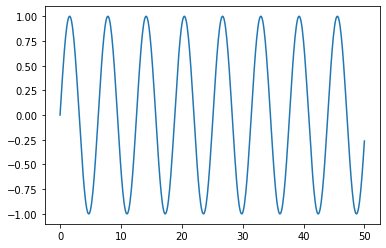

In [5]:
plt.plot(X,y)

In [6]:
# convert it into DataFrame

df = pd.DataFrame(data = y, index = X, columns = ["sine"] )

In [7]:
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [8]:
# train test split

In [9]:
len(df)

501

In [10]:
test_percent = 0.1

test_point = np.round(len(df)*test_percent)

In [11]:
test_point

50.0

In [12]:
train_point = int(len(df) - test_point)

In [13]:
train_point  # so total is 451 + 50 = 501

451

In [14]:
train = df.iloc[:train_point]

In [15]:
test = df.iloc[train_point:]

In [16]:
# scaling the data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [20]:
train_scaled.min(), test_scaled.max()

(0.0, 0.9994531695555238)

In [21]:
# convert it into sequence data

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
# let get my hand's dirty

#   1,2,3,4,5,6,7,8,9 ==>  [1,2]=>[3], [2,3]=>[4], [3,4]=>[5], [4,5]=>[6], [5,6]=>[7], [6,7]=>[8] 

#   [1,2] ==> length = 2
#   [3]   ==> batch = 3


In [24]:
length = 2
batch_size = 1

generator = TimeseriesGenerator(
                                train_scaled, train_scaled , length = length, batch_size = batch_size
                            )

In [25]:
generator[0]

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [26]:
train_scaled[:3]

array([[0.49999912],
       [0.54991622],
       [0.59933458]])

In [27]:
# like that it would show 

<AxesSubplot:>

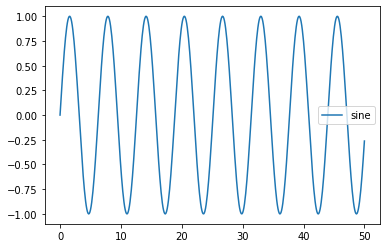

In [28]:
df.plot()

In [29]:
# taking 0 to 25 point on x- axis for training

In [30]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(
                                train_scaled, train_scaled , length = length, batch_size = batch_size
                            )


In [31]:
generator[0]

(array([[[4.99999116e-01],
         [5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
 

In [32]:
# creating the model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [34]:
n_feature = 1 
# because in our dataset the result value is one that why

In [35]:
model = Sequential(
            SimpleRNN(50, input_shape = (length, n_feature)),
            
)

model.add(Dense(1))

In [36]:
model.compile(
    optimizer= "adam",
    loss = "mse"
)

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [38]:
Model = model.fit_generator( generator, epochs = 5)

C:\Users\jawah\anaconda3\envs\py37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
401/401 [==============================] - 2s 4ms/step - loss: 0.0111
Epoch 2/5
401/401 [==============================] - 2s 4ms/step - loss: 6.8952e-05
Epoch 3/5
401/401 [==============================] - 2s 4ms/step - loss: 1.3033e-04
Epoch 4/5
401/401 [==============================] - 2s 4ms/step - loss: 8.6284e-05
Epoch 5/5
401/401 [==============================] - 2s 4ms/step - loss: 5.0848e-05


<AxesSubplot:>

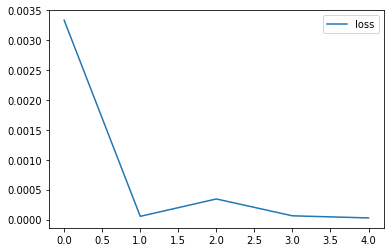

In [39]:
pd.DataFrame(Model.history).plot()

In [73]:
# evaluating our test data

In [40]:
first_test_batch = train_scaled[-length:]

In [41]:
# reshaping

first_test_batch = first_test_batch.reshape(1,length,n_feature)

In [42]:
model.predict(first_test_batch)

array([[0.9512537]], dtype=float32)

In [43]:
test_scaled[0]

array([0.94955134])

In [44]:
# some how similar points result prediction

In [51]:
# now, with for loop

test_prediction = []

first_test_batch = train_scaled[-length:]

# reshape
current_batch = first_test_batch.reshape(1,length, n_feature)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

In [52]:
test_prediction

[array([0.9512537], dtype=float32),
 array([0.9709822], dtype=float32),
 array([0.9864541], dtype=float32),
 array([0.9964643], dtype=float32),
 array([1.0023907], dtype=float32),
 array([1.0031261], dtype=float32),
 array([0.9988208], dtype=float32),
 array([0.9897525], dtype=float32),
 array([0.9761373], dtype=float32),
 array([0.9582615], dtype=float32),
 array([0.93566906], dtype=float32),
 array([0.9095687], dtype=float32),
 array([0.8794372], dtype=float32),
 array([0.8460955], dtype=float32),
 array([0.809453], dtype=float32),
 array([0.77042806], dtype=float32),
 array([0.72902375], dtype=float32),
 array([0.68574864], dtype=float32),
 array([0.640785], dtype=float32),
 array([0.59478545], dtype=float32),
 array([0.5479504], dtype=float32),
 array([0.5007948], dtype=float32),
 array([0.453591], dtype=float32),
 array([0.40705913], dtype=float32),
 array([0.36145478], dtype=float32),
 array([0.31721172], dtype=float32),
 array([0.27496627], dtype=float32),
 array([0.23508157], d

In [53]:
true_prediction = scaler.inverse_transform(test_prediction)

In [54]:
true_prediction

array([[ 0.90250195],
       [ 0.9419586 ],
       [ 0.97290222],
       [ 0.99292242],
       [ 1.00477519],
       [ 1.00624598],
       [ 0.99763533],
       [ 0.97949885],
       [ 0.95226869],
       [ 0.91651739],
       [ 0.8713329 ],
       [ 0.81913265],
       [ 0.75887009],
       [ 0.69218722],
       [ 0.61890282],
       [ 0.54085355],
       [ 0.4580456 ],
       [ 0.37149606],
       [ 0.28156947],
       [ 0.18957115],
       [ 0.09590177],
       [ 0.00159141],
       [-0.09281551],
       [-0.18587847],
       [-0.27708644],
       [-0.36557186],
       [-0.45006208],
       [-0.52983084],
       [-0.60379002],
       [-0.67204355],
       [-0.73274193],
       [-0.78592195],
       [-0.83033189],
       [-0.86660726],
       [-0.89325244],
       [-0.91054816],
       [-0.91831147],
       [-0.91677623],
       [-0.90578254],
       [-0.88529096],
       [-0.85631058],
       [-0.81873058],
       [-0.77307227],
       [-0.71934056],
       [-0.65903128],
       [-0

In [55]:
test["prediction"] = true_prediction

C:\Users\jawah\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

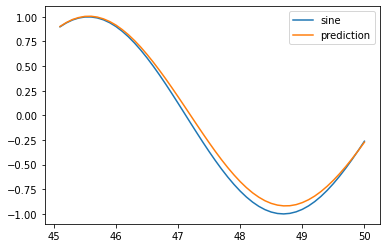

In [56]:
test.plot()

In [57]:
test

,sine,prediction
45.1,0.899097,0.902502
45.2,0.938307,0.941959
45.3,0.968142,0.972902
45.4,0.988304,0.992922
45.5,0.998591,1.004775
45.6,0.998900,1.006246
45.7,0.989229,0.997635
45.8,0.969673,0.979499
45.9,0.940429,0.952269
46.0,0.901788,0.916517
